In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Predict Hair Fall.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,184367,Yes,No,Seborrheic Dermatitis,Rogaine,Vitamin A Deficiency,Low,33,Yes,Yes,Yes,Yes,1
995,164777,Yes,Yes,No Data,Accutane,Protein deficiency,Low,47,No,No,No,Yes,0
996,143273,No,Yes,Androgenetic Alopecia,Antidepressants,Protein deficiency,Moderate,20,Yes,No,Yes,Yes,1
997,169123,No,Yes,Dermatitis,Immunomodulators,Biotin Deficiency,Moderate,32,Yes,Yes,Yes,Yes,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Id                         999 non-null    int64 
 1   Genetics                   999 non-null    object
 2   Hormonal Changes           999 non-null    object
 3   Medical Conditions         999 non-null    object
 4   Medications & Treatments   999 non-null    object
 5   Nutritional Deficiencies   999 non-null    object
 6   Stress                     999 non-null    object
 7   Age                        999 non-null    int64 
 8   Poor Hair Care Habits      999 non-null    object
 9   Environmental Factors      999 non-null    object
 10  Smoking                    999 non-null    object
 11  Weight Loss                999 non-null    object
 12  Hair Loss                  999 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 101.6+ KB


In [ ]:
df.isnull().sum()

Id                           0
Genetics                     0
Hormonal Changes             0
Medical Conditions           0
Medications & Treatments     0
Nutritional Deficiencies     0
Stress                       0
Age                          0
Poor Hair Care Habits        0
Environmental Factors        0
Smoking                      0
Weight Loss                  0
Hair Loss                    0
dtype: int64

In [ ]:
df.describe()

,Id,Age,Hair Loss
count,999.000000,999.000000,999.000000
mean,153354.673674,34.188188,0.497497
std,25516.041985,9.377980,0.500244
min,110003.000000,18.000000,0.000000
25%,131867.500000,26.000000,0.000000
50%,152951.000000,34.000000,0.000000
75%,174969.000000,42.000000,1.000000
max,199949.000000,50.000000,1.000000


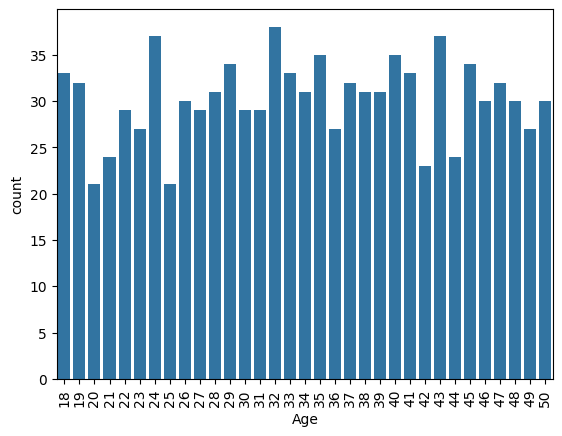

In [ ]:
sns.countplot(x='Age',data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
gen=df["Genetics"].value_counts()
gen

Genetics
Yes    522
No     477
Name: count, dtype: int64

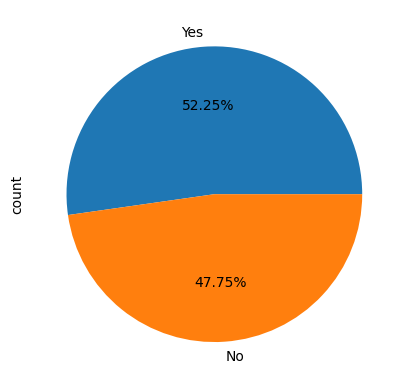

In [ ]:
gen.plot(kind="pie",subplots=True,autopct="%1.2f%%")
plt.show()

<Axes: xlabel='Age', ylabel='Stress'>

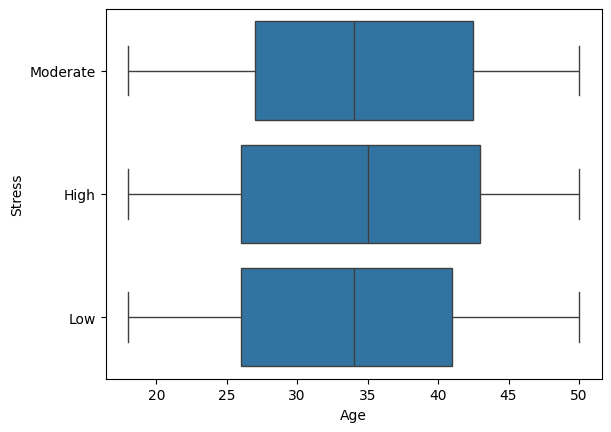

In [ ]:
sns.boxplot(x="Age",y="Stress",data=df)

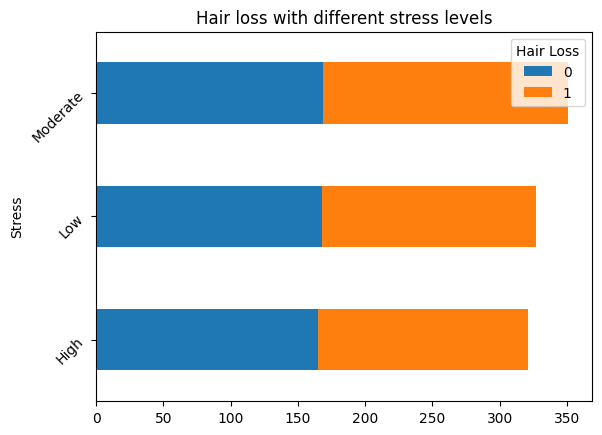

In [ ]:
df.groupby('Stress')['Hair Loss'].value_counts(normalize= False).unstack('Hair Loss').plot.barh(stacked=True)
plt.title('Hair loss with different stress levels')
plt.yticks(rotation=45)
plt.show()


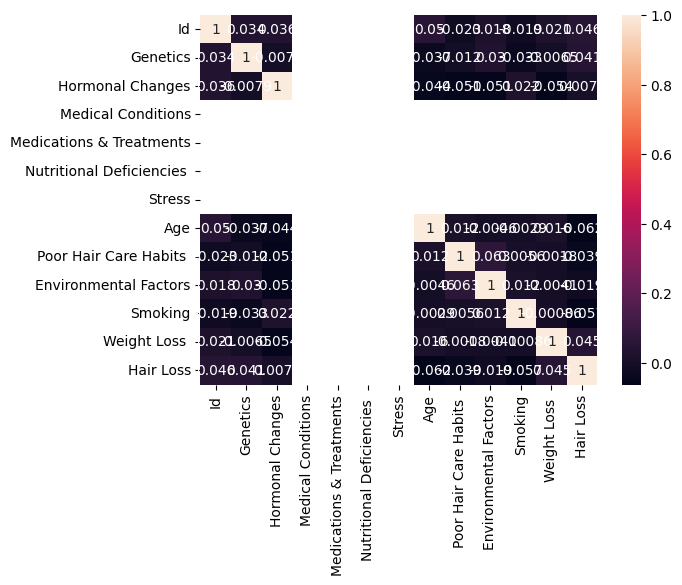

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column is of object type (likely string)
        df[col] = df[col].map({'Yes': 1, 'No': 0})  # Replace 'Yes' with 1, 'No' with 0

sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop(["Hair Loss","Id"],axis=1)
y=df["Hair Loss"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
lo=LogisticRegression()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
x = imputer.fit_transform(x)

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=0)

lo = LogisticRegression()
lo.fit(xtrain, ytrain)

LogisticRegression()

In [ ]:
ypred=lo.predict(xtest)
ypred

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1])

In [ ]:
y_train_pred = lo.predict(xtrain)
ypred = lo.predict(xtest)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_lr = accuracy_score(ytest,ypred)
cla=classification_report(ytest,ypred)
con=confusion_matrix(ytest,ypred)
print("Train Result:\n==================================================")
print(accuracy_score(ytrain,y_train_pred)*100)
print("")

print("Test Result:\n==================================================")
print(accuracy_score(ytest,  ypred)*100)
print("")

print("_________________________________________________________")
print("Classification Report")
print(cla)
print("_________________________________________________________")
print("")
print("confussion_matrix:")
print(con)

Train Result:
53.066332916145186

Test Result:
57.49999999999999

_________________________________________________________
Classification Report
              precision    recall  f1-score   support

           0       0.58      0.58      0.58       102
           1       0.57      0.57      0.57        98

    accuracy                           0.57       200
   macro avg       0.57      0.57      0.57       200
weighted avg       0.58      0.57      0.58       200

_________________________________________________________

confussion_matrix:
[[59 43]
 [42 56]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dic=DecisionTreeClassifier()

In [ ]:
dic.fit(xtrain,ytrain)


DecisionTreeClassifier()

In [ ]:
y_train_pred1 = dic.predict(xtrain)
ypred1 = dic.predict(xtest)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_lr = accuracy_score(ytest,ypred1)
cla=classification_report(ytest,ypred1)
con=confusion_matrix(ytest,ypred1)
print("Train Result:\n================================================")
print(accuracy_score(ytrain,y_train_pred1)*100)
print("")

print("Test Result:\n==============================================")
print(accuracy_score(ytest,ypred1)*100)
print("")

print("___________________________________________")
print("Classification Report:")
print(cla)
print("_____________________________________________")
print("")

print("confusion_matrix:")
print(con)

Train Result:
92.86608260325406

Test Result:
53.0

___________________________________________
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.49      0.52       102
           1       0.52      0.57      0.54        98

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.53      0.53      0.53       200

_____________________________________________

confusion_matrix:
[[50 52]
 [42 56]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [ ]:
kypre=knn.predict(xtest)
kypre

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
kac=accuracy_score(ytest,kypre)*100
kac

55.00000000000001

In [ ]:
from sklearn.svm import SVC

In [ ]:
sv=SVC(max_iter=-1)

In [ ]:
sv.fit(xtrain,ytrain)

SVC()

In [ ]:
yp=sv.predict(xtest)
yp

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0])

In [ ]:
ac7=accuracy_score(ytest,yp)*100
print("The Accuracy score for sv:",ac7)

The Accuracy score for sv: 52.5


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ad=AdaBoostClassifier(n_estimators=100,random_state=0)

In [ ]:
ad.fit(xtrain,ytrain)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
yy=ad.predict(xtest)
yy

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1])

In [ ]:
a8=accuracy_score(ytest,yy)*100
a8

52.0

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
!pip install tensorflow
import tensorflow as tf

In [ ]:
model=Sequential()
model.add(Dense(units=13,activation="tanh"))
model.add(Dense(units=160,activation="tanh"))
model.add(Dense(units=90,activation="tanh"))
model.add(Dense(units=45,activation="tanh"))
model.add(Dense(units=1,activation="sigmoid"))

In [ ]:
opt =tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
model.compile(loss="binary_crosstropy",optimizer=opt,metrics=["accuracy"])

In [ ]:
model.fit(xtrain,ytrain,epochs=500,batch_size=10)

Epoch 1/500
80/80 [==============================] - 0s 2ms/step - loss: 0.6679 - accuracy: 0.5807
Epoch 2/500
80/80 [==============================] - 0s 3ms/step - loss: 0.6760 - accuracy: 0.5544
Epoch 3/500
80/80 [==============================] - 0s 3ms/step - loss: 0.6675 - accuracy: 0.5757
Epoch 4/500
80/80 [==============================] - 0s 3ms/step - loss: 0.6702 - accuracy: 0.5770
Epoch 5/500
80/80 [==============================] - 0s 3ms/step - loss: 0.6690 - accuracy: 0.5782
Epoch 6/500
80/80 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.5544
Epoch 7/500
80/80 [==============================] - 0s 2ms/step - loss: 0.6697 - accuracy: 0.5907
Epoch 8/500
80/80 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.5695
Epoch 9/500
80/80 [==============================] - 0s 3ms/step - loss: 0.6725 - accuracy: 0.5807
Epoch 10/500
80/80 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.5907
Epoch 11/

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                104       
                                                                 
 dense_1 (Dense)             (None, 160)               2240      
                                                                 
 dense_2 (Dense)             (None, 90)                14490     
                                                                 
 dense_3 (Dense)             (None, 45)                4095      
                                                                 
 dense_4 (Dense)             (None, 1)                 46        
                                                                 
Total params: 20975 (81.93 KB)
Trainable params: 20975 (81.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
mse_values ={'liner_regression': 1912.4072205848418,'RIdge': 1912.4002330743629,'SVR': 2842.6338000438527,'Random_forest':37}

models=list(mse_values.keys())
mse_scores = (mse_values.values())

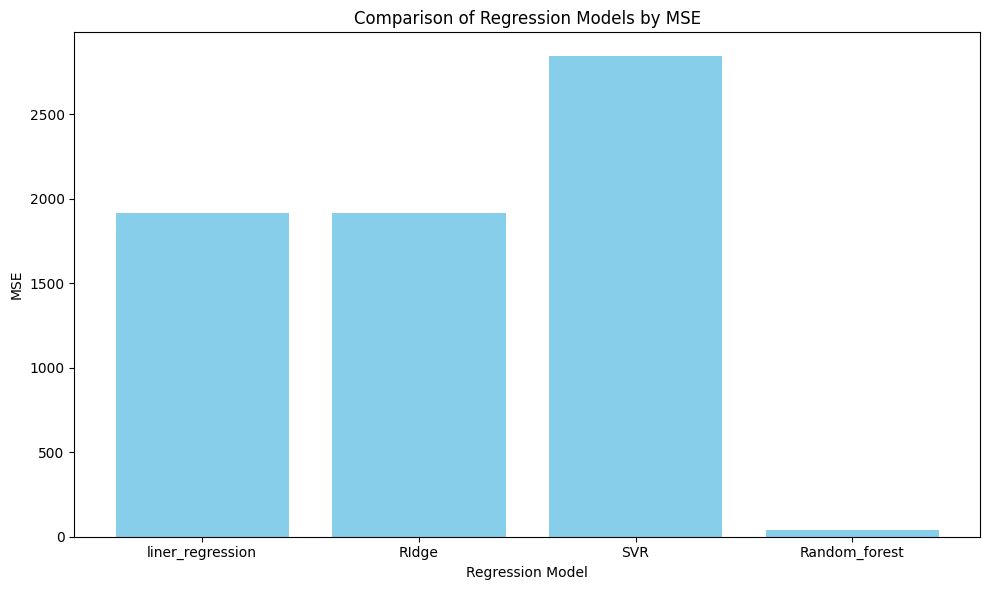

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(models, mse_scores, color='skyblue')
plt.xlabel('Regression Model')
plt.ylabel('MSE')
plt.title('Comparison of Regression Models by MSE')
plt.tight_layout()
plt.show()

In [ ]:
X_input=[[0.133218,0.2333390,0.20606,0.758036,0.136519,2017,217]]
prediction = model.predict(X_input)
print(prediction)

1/1 [==============================] - 0s 35ms/step
[[1.33218e-01 2.33339e-01 2.06060e-01 7.58036e-01 1.36519e-01 2.01700e+03
  2.17000e+02]]


In [ ]:
_input=[[-0.054981, 0.885919, 0.019357, 0.42204, -0.819113, 1974, 0]]
prediction = model.predict(X_input)
print(prediction)

1/1 [==============================] - 0s 46ms/step
[[1.33218e-01 2.33339e-01 2.06060e-01 7.58036e-01 1.36519e-01 2.01700e+03
  2.17000e+02]]


In [ ]:
import pickle
pickle.dump(model,open("model.pkl","wb"))
from tensorflow.keras.models import save_model
save_model(model, "model.h5")

<ipython-input-20-d69a4bfb3660>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, "model.h5")


In [ ]:
import numpy as np
input_data = np.array([0,1,9,1,5,31,1,1,1,0,0,0,1])

print(input_data.shape)


(13,)


In [ ]:
input_data = input_data.reshape(1,-1)
print(input_data.shape)

(1, 13)


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
model1 = load_model('model.h5')

input_data = np.array([0,1,9,1,5,31,1,1,1,0,0,0,1])
input_data = input_data.reshape(1,-1)

model1.predict(input_data)

1/1 [==============================] - 0s 38ms/step


array([[ 0,  1,  9,  1,  5, 31,  1,  1,  1,  0,  0,  0,  1]])

In [ ]:
import pickle
from sklearn.svm import SVR

svr_model = SVR()

X_train = [[0, 1], [1, 1], [1, 0]]
y_train = [0, 1, 1]
svr_model.fit(X_train, y_train)

pickle.dump(svr_model, open('model.pkl', 'wb'))